# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Graphs without labels (or units when appropriate) are not worth any point.
3. Do put in sufficient explanatory comments in your code.
4. Functions are very important. Do look up the video on the Safari O'Reilly ressource if you are still not clear on them !

For this week you can use these imports at the start of your programs:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We will use a new module `uncertainties`, which is **not** standard in the colab environment. You will have to first run:

In [3]:
! pip install -q uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.3 MB/s eta 0:00:00


To install the module before you can import it:

In [4]:
import uncertainties as uc
import uncertainties.umath as um # for maths functions

# Introduction
In the practical classes PX2133/PX2233 and PX2338 (Obs tech), as well as your year 3/4 project, a lot of emphasis is placed on the determination and mathematical handling of errors.
The uncertainties module allows us to deal very easily with [error propagation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). For this sheet you should remind yourself about error bars in measurements and about propagation of uncertainties. Take an example from your lab handbook:

**Example 1**: If the length of a rectangle is $1.24\pm0.02 m$ and its breadth is $0.61\pm0.01 m$, what is its area and the error in the area? The following code snippet solves this problem in a few lines.

In [5]:
L = uc.ufloat(1.24, 0.02)
W = uc.ufloat(0.61, 0.01)
print ('Area is:', L*W, 'm^2') # Do remember to add the units when printing!

Area is: 0.756+/-0.017 m^2


**Note**: For the area itself, it's fairly straightforward:

In [6]:
1.24*0.61

0.7564

However, for the error bar on this number:

In [7]:
0.02*0.01

0.0002

does not work. Instead, the [error progation formula](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae) gives:

In [8]:
np.abs(1.24*0.61)*np.sqrt((0.02/1.24)**2+(0.01/0.61)**2)

np.float64(0.01739540169125163)

So the area is $0.756\pm0.017 m^2$. `uncertainties` obviously saves a lot of work, even for such a simple case. You can also take a look at the web site uncertainties hosted at https://pythonhosted.org/uncertainties/user_guide.html. In particular, [this section](https://pythonhosted.org/uncertainties/user_guide.html#access-to-the-uncertainty-and-to-the-nominal-value) shows some of the properties of a `ufloat` you can access directly.

**Example 2**: A reference object is $10.0\pm0.0001 m$ long, and makes a viewing angle of $0.62\pm0.02 rad$. How far is it?

In [9]:
L = uc.ufloat(10.0, 0.0001)
theta = uc.ufloat(0.62,0.02)

Distance = (L/2)/um.tan(theta/2)

print ('Distance is:', Distance.nominal_value, 'm, with an error of:', Distance.std_dev)

Distance is: 15.609024890896208 m, with an error of: 0.537283338762715


Note the need to use "umath" functions (like `um.tan()` instead of `np.tan()`), and how to get the nominal value and the standard deviation of the uncertainties objects. To get nicer looking output, such as controlling the number of significant digits printed, you can use the information about formatting at https://docs.python.org/3/tutorial/inputoutput.html. In the exercises below you need to print the values to the screen. (Don’t forget units.)

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0
[0] With some approximations, we have measured the mass of the following black-holes:
```
"35.6+/-3.9","30.6+/-3.7","63.1+/-3.2","23.2+/-9.8","13.6+/-4.5","35.7+/-6.8","13.7+/-6.0","7.7+/-2.4","20.5+/-4.0"
```
Compute for each (with error-bars) their lifetime due to Hawking radiation:
$$
t = \left(\frac{M}{M_{\odot}}\right)^3\,\times\,2.097\,\times\,10^{67} yr
$$

(this exercise is for demonstration purposes and won't be marked)

In [10]:
import uncertainties as uc
import uncertainties.umath as um

# Black hole masses from the exercise description
mass_strings = ["35.6+/-3.9", "30.6+/-3.7", "63.1+/-3.2", "23.2+/-9.8", "13.6+/-4.5", "35.7+/-6.8", "13.7+/-6.0", "7.7+/-2.4", "20.5+/-4.0"]

# Convert mass strings to ufloat objects
masses = []
for s in mass_strings:
    value_str, error_str = s.split('+/-')
    masses.append(uc.ufloat(float(value_str), float(error_str)))

# Define M_solar (assuming M in the input strings are already in solar masses)
M_solar = uc.ufloat(1.0, 0.0) # Represents 1 solar mass, no uncertainty given for the unit itself

# Define the constant
constant = 2.097 * (10**67)

# Calculate and print the lifetime for each black hole
print("Hawking Radiation Lifetimes:")
for i, M in enumerate(masses):
    # Calculate lifetime using the formula: t = (M / M_solar)^3 * constant
    t = (M / M_solar)**3 * constant
    print(f"Black Hole {i+1}: {t} yr")

Hawking Radiation Lifetimes:
Black Hole 1: (9.5+/-3.1)e+71 yr
Black Hole 2: (6.0+/-2.2)e+71 yr
Black Hole 3: (5.3+/-0.8)e+72 yr
Black Hole 4: (2.6+/-3.3)e+71 yr
Black Hole 5: (5+/-5)e+70 yr
Black Hole 6: (1.0+/-0.5)e+72 yr
Black Hole 7: (5+/-7)e+70 yr
Black Hole 8: (1.0+/-0.9)e+70 yr
Black Hole 9: (1.8+/-1.1)e+71 yr


/usr/local/lib/python3.12/dist-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


## Exercise 1
[2] An object is measured to travel a distance $x = 5.1 \pm 0.4 m$ during a time of $t = 0.4 \pm 0.1 s$. What is the average velocity and the error in the average velocity?

In [11]:
x=uc.ufloat(5.1, 0.4)
t=uc.ufloat(0.4, 0.1)

print('The average velocity is:', x/t, 'm/s')

The average velocity is: 12.7+/-3.3 m/s


## Exercise 2
[2] An enterprising cow attempts to jump over the moon by jumping vertically into the air with initial speed $v_0=4.0\pm0.2 m/s$. After a time $t=0.60\pm0.06s$, the height of the cow is $h = v_0t-\frac{1}{2}g t^2 = 0.636 m$. What is the uncertainty in $h$? Take $g$ as exactly $9.81 ms^{-2}$.

In [12]:
v = uc.ufloat(4.0, 0.2)
t = uc.ufloat(0.60, 0.06)
g = 9.81

h = v*t - 0.5*g*t**2

print('The height of the cow is:', h, 'm')

The height of the cow is: 0.63+/-0.16 m


## Exercise 3
[2] In an optics experiment the object distance $u$ is measured to be 20cm and the image distance $v$ is 10cm, both to an accuracy of 0.5cm. Find the focal length $f$ of the lens using the formula:

$$ \frac{1}{u}+\frac{1}{v}=\frac{1}{f}$$

In [13]:
u=uc.ufloat(20, 0.5)
v=uc.ufloat(10, 0.5)

f=1/(u+v)

print('The focal length of the lens is:', f, 'cm')

The focal length of the lens is: 0.0333+/-0.0008 cm


## Exercise 4
[2] Two students each measure the refractive index of water. Jack measures a value of $1.33 \pm 0.03$ while Jill measures $1.28 \pm 0.02$. Are these values in agreement? *You do have to think a bit about this one...*

In [14]:
ri_jack = uc.ufloat(1.33, 0.03)
ri_jill = uc.ufloat(1.28, 0.02)

print('The difference between Jack and Jill is:', ri_jack - ri_jill)

The difference between Jack and Jill is: 0.05+/-0.04


## Exercise 5
[2] The damped resonance frequency $\omega_{res}$ of an oscillating system is related to the (un-damped) natural angular frequency $\omega_0$ and the damping coefficient $\alpha$ by:

$$\omega_{res} = \sqrt{ \omega_0^2 - 2\alpha^2}$$

Find $f_0$ if the measured resonance frequency $f_{res}$ is $23.2\pm0.1 Hz$ and the measured damping coefficient is $19.5\pm0.5s^{-1}$.


In [15]:
fres = uc.ufloat(23.2, 0.1)
a = uc.ufloat(19.5, 0.5)

Wres = 2*np.pi*fres

W0 = (Wres**2 + 2*a**2)**(1/2)

f0 = W0/(2*np.pi)

print('The natural frequency is:', f0, 'Hz')



The natural frequency is: 23.61+/-0.10 Hz


## Exercise 6
[2] Suppose you have the following equation from one of your lab experiments:

$$f=\frac{c}{2}\sqrt{\frac{n_x^2}{L_x^2}+\frac{n_y^2}{L_y^2}+\frac{n_z^2}{L_z^2}}$$

where $f$ is the resonant frequency of sound waves in a box of sides $L_x$, $L_y$ and $L_z$ in length and the $n_x$ etc. are integers. $L_x = 10.2\pm0.2m$, $L_y = 5.2\pm0.3m$ and $L_z = 20.0\pm0.1 m$, while $c = 331.3 + T * 0.606 \,m\,s^{-1}$ is the temperature-dependent speed of sound, and the temperature $T$ is $23 \pm 1^\circ C$.
Calculate $f$ and the error in $f$ for the following values of $(nx,ny,nz)= (1,1,1), (1,1,2)$ and $(2,1,1)$.


In [16]:
L_x = uc.ufloat(10.2, 0.2)
L_y = uc.ufloat(5.2, 0.3)
L_z = uc.ufloat(20.0, 0.1)
T = uc.ufloat(23, 1)
c = 331.3 + T * 0.606

n_values = [(1, 1, 1), (1, 1, 2), (2, 1, 1)]


for nx, ny, nz in n_values:
    f = (c / 2) * um.sqrt((nx**2 / L_x**2) + (ny**2 / L_y**2) + (nz**2 / L_z**2))

    print(f'For (nx, ny, nz) = ({nx}, {ny}, {nz}), the resonant frequency f is: {f} Hz')

For (nx, ny, nz) = (1, 1, 1), the resonant frequency f is: 38.2+/-1.7 Hz
For (nx, ny, nz) = (1, 1, 2), the resonant frequency f is: 41.1+/-1.6 Hz
For (nx, ny, nz) = (2, 1, 1), the resonant frequency f is: 48.2+/-1.4 Hz


## Exercise 7
[4] The reflection coefficient $R_\parallel$ for parallel plane-polarised light reflected from a surface is given by the equation:

$$ R_\parallel = \frac{\tan^2(\theta_i - \theta_t)}{\tan^2(\theta_i + \theta_t)} $$

Calculate the error in $R_\parallel$ given measurements $\theta_i = (78 \pm 1)^\circ$ and $\theta_t = (40 \pm 1)^\circ$.

In [17]:
Theta_i = uc.ufloat(78, 1)
Theta_t = uc.ufloat(40, 1)

R_parallel = (um.tan(Theta_i - Theta_t)**2)/(um.tan(Theta_i + Theta_t)**2)

print(f'The reflection coefficient is: {R_parallel.std_dev:2g}')

The reflection coefficient is: 0.0650677


## Exercise 8
[4] Calculate and print to the screen the fractional uncertainty, as a percentage to one
significant figure, of the fluid flow discharge coefficient $C_d$ from the equation

$$
C_d = \frac{\dot{m}\sqrt{1-\left(\frac{d}{D}\right)^4}}{Kd^2F\sqrt{\rho\Delta P}}
$$

where

\begin{align*}
    C_d &= \text{discharge coefficient}&& \text{(no units)} \\
    \dot{m} &= \text{mass flow rate}&& = 0.13 \pm 0.01kg\,s^{-1} \\
    d &= \text{orifice diameter}&& = 11\pm 1 mm \\
    D &= \text{pipe diameter}&& = 71 \pm 1 mm \\
    \rho &= \text{fluid density}&& =1.01\pm0.01g\,cm^{-3} \\
    \Delta P &= \text{differential pressure}&& =156 \pm 7 Pa \\
    K &= \text{a constant parameter}&& =\text{constant (no units)} \\
    F &= \text{thermal expansion factor}&& =\text{constant (no units)}
\end{align*}


In [18]:
m = uc.ufloat(0.13, 0.01)
d = uc.ufloat(11e-3, 1e-3)
D = uc.ufloat(71e-3, 1e-3)
rho = uc.ufloat(1.01e3, 0.01e3)
DeltaP = uc.ufloat(156, 7)
K = 1
F = 1

Cd = (m * um.sqrt(1 - (d/D)**4)) / (K * d**2 * F * um.sqrt(rho * DeltaP))

fractional_uncertainty = (Cd.std_dev / Cd.nominal_value) * 100

print(f'The fractional uncertainty of the fluid flow discharge coefficient is: {fractional_uncertainty:.1g} %')

The fractional uncertainty of the fluid flow discharge coefficient is: 2e+01 %


## Exercise 9: Optional problem (not marked)
If you have time and want to try something interesting, do the following problem by plotting in 2D:
 - Draw an equilateral triangle with vertices and coordinates: vertex 1: $(p_1,q_1)$; vertex 2: $(p_2, q_2)$; vertex 3: $(p_3, q_3)$.
 - Place a dot at an arbitrary point $P = (x_0, y_0)$ within this triangle.
 - Find the next point by selecting randomly an integer $n = 1 , 2, $  or $3$ :
    1. If 1 , place a dot halfway between P and vertex 1.
    2. If 2 , place a dot halfway between P and vertex 2.
    3. If 3 , place a dot halfway between P and vertex 3.
 - Repeat the last two steps using the last dot as the new P.

Mathematically, the coordinates of successive points are given by the formulae

$$(x_{i+1},y_{i+1})=0.5[(x_i,y_i)+(p_n,q_n)]$$

and

$$n=int(1+3r_i),$$

where $r_i$ is a random number between 0 and 1 and where the $int()$ function outputs the closest integer smaller than or equal to the argument.

Try extending this to four vertices.

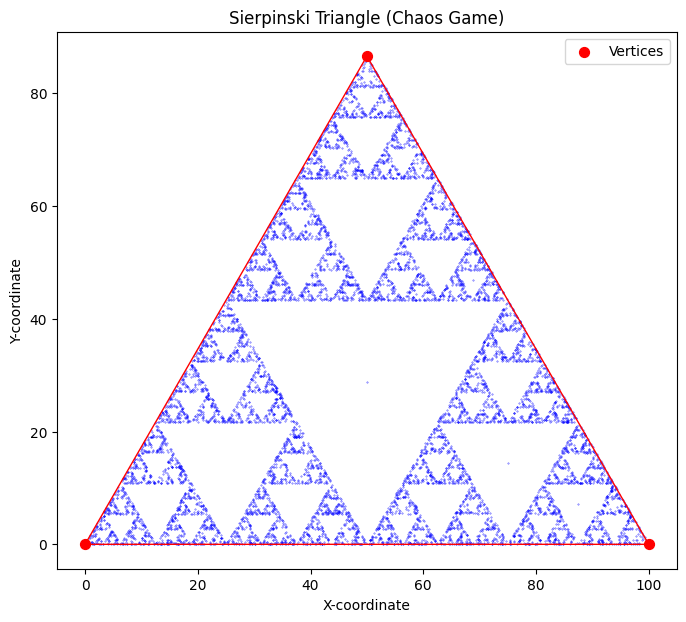

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of an equilateral triangle
# Using a side length of 100 for better visualization
V1 = np.array([0.0, 0.0])
V2 = np.array([100.0, 0.0])
V3 = np.array([50.0, 100.0 * np.sqrt(3)/2]) # Height of equilateral triangle = side * sqrt(3)/2

vertices = [V1, V2, V3]

# Choose an arbitrary starting point P within the triangle
# For simplicity, let's use the centroid of the triangle
P = (V1 + V2 + V3) / 3.0

# Store the generated points
points_x = [P[0]]
points_y = [P[1]]

# Number of iterations
num_iterations = 10000

# Generate points
for _ in range(num_iterations):
    # Select a random vertex (n = 1, 2, or 3)
    r = np.random.rand() # Random number between 0 and 1
    n = int(1 + 3 * r)

    # Select the corresponding vertex
    target_vertex = vertices[n - 1]

    # Calculate the next point (midpoint between P and the target_vertex)
    P = 0.5 * (P + target_vertex)

    # Store the new point
    points_x.append(P[0])
    points_y.append(P[1])

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(points_x, points_y, s=0.1, color='blue', alpha=0.8)

# Plot the vertices of the triangle for reference
plt.plot([V1[0], V2[0], V3[0], V1[0]], [V1[1], V2[1], V3[1], V1[1]], 'r-', linewidth=1)
plt.scatter([V1[0], V2[0], V3[0]], [V1[1], V2[1], V3[1]], color='red', marker='o', s=50, label='Vertices')

plt.title('Sierpinski Triangle (Chaos Game)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.gca().set_aspect('equal', adjustable='box') # Maintain aspect ratio
plt.legend()
plt.show()